**Problema** 1-3

Para una temperatura de $723$ K y un volumen molar $1$ dm$^{3}$, empleando los modelos de gas ideal, esferas duras y Van der Waals, graficar entre $10^{-5}$ y $500$ bar:

a) $Z \, \, vs \, \, p$ 

b) $(Z-1)/p \, \, vs \, \, p$

c) $\ln \varphi \, \, vs \, \, p$




**Resolución:**

Este ejercicio nos permitirá no solo aprender/repasar cómo graficar una dada función con python, sino que también sirve de caso de estudio para aprender a integrar numéricamente. ¿Por qué hablamos de integración? Bueno, porque el $\ln \varphi$ a una dada presión se calcula como la integral de $(Z-1)/p$ entre $0$ (o $p$ tendiendo a $0$) y la presión a la cual se quiere conocer $\ln \varphi$:

$$ \ln \varphi  = \int_{p \to 0}^{p}\frac{Z-1}{p} dp $$ 

Pero esto nos lo piden recién en el item c, por lo que primero nos concentraremos en los items **a** y **b**, que son más directos.

Comenzaremos por **importar** algunas **bibliotecas** que nos permitirán realizar operaciones matemáticas y gráficar.

Numpy (https://numpy.org/) es una de las librerías más poderosas de python, y sus alcances van mucho más allá de lo que utilizaremos en este ejercicio. Nos permite realizar diversas operaciones matemáticas con **arrays** (matrices), leer y escribir archivos .csv, entre otras cosas.

Matplotlib (https://matplotlib.org/) es una librería que permite generar gráficos (y animaciones), y en particular **pyplot** es un subconjunto de funciones de ella que permite generar gráficos de forma particularmente simple.

Para importar numpy y pyplot, ejecutamos:

In [1]:
import numpy as np # importo numpy con el alias np
import matplotlib.pyplot as plt # importo pyplot de matplotlib con el alias plt

El siguiente paso es cargar nuestras los valores de nuestros parámetrosen el programa. Esto puede realizarse de varias maneras (por ejemplo, podríamos leerlos de un archivo aparte), pero para mantener el código simple, procederemos a asignar los valores de los parámetros a variables dentro del mismo código: 

In [2]:
R = 0.08314 # bar.dm3/K mol
a = 3.640 # dm6 bar/mol2
b = 0.04267 # L/mol
T = 373 # K

Lo que nos conviene ahora es definir funciones para calcular $Z$ según distintos modelos, que tomen como variables $T$, $p$ y los parámetros del modelo en particular.

Pero antes de programar, tenemos que resolver nuestro problema en "lápiz y papel". La estrategia a seguir es, para cada modelo, despejar $\bar{V}$ en función del resto de las variables, para luego reemplazar en $Z$:

$$ Z = \frac{p \bar{V}}{RT} $$

*  Para gases ideales (GI):

$$ p = \frac{RT}{\bar{V}} ⇒ \bar{V} = \frac{RT}{p} $$

De modo que:


$$ Z_{GI} = \frac{p \bar{V}}{RT} = \frac{p}{RT} \ \frac{RT}{p}$$

$$ \boxed{Z_{GI} = 1}$$

Es decir, $Z_{GI}$ es siempre igual a $1$, para cualquier $p$.

No es necesario definir una función en este caso, pero lo haremos de todas maneras para mantener la "homogeneidad" de nuestro enfoque:




In [3]:
def calcularZ_GI(R,p,T): 
  return 1.0

* El caso de esferas duras (GED) también es relativamente sencillo, por que podemos despejar $\bar{V}$:


$$ p = \frac{RT}{\bar{V}-b} ⇒ \bar{V} = \frac{RT}{p}+b $$

Y luego,

$$ Z_{GED} = \frac{p \bar{V}}{RT} = \frac{p}{RT} \ (\frac{RT}{p}+b)$$

$$ \boxed{ Z_{GED} = 1+\frac{p \ b}{RT} }$$

In [4]:
def calcularZ_GED(b,R,p,T): 
  return (p*b/(R*T))+1.0

* Por último, caso del modelo de Van de Waals (VdW) es un poco más complejo, debido a que es difícil "despejar" $\bar{V}$. Más precisamente, requiere encontrar las raíces de un polinomio de grado tres.

Para VdW:

$$ p=\frac{RT}{\bar{V}-b}-\frac{a}{\bar{V}^{2}} $$

Se obtiene que:

$$ p\bar{V}^{3}-(b \ p + RT)\bar{V}^{2}+a \bar{V} - a \ b=0 $$

De modo que si queremos saber, para una dada presión y temperatura, el volumen molar del gas, tenemos que encontrar las raíces del polinomio $f(\bar{V})$:

$$ f(\bar{V})=A \bar{V}^{3} + B \bar{V}^{2} + C \bar{V} + D $$

Donde:

$$ A = p \qquad B = -(b \ p + RT) \qquad C = a \qquad D = -ab $$

Lo primero a notar es que no habrá una única solución. Sin embargo, solo una de las soluciones tendrá significado fisicoquímico*. Nos quedaremos con la solución real más grande.

___
( * ) No es trivial de demostrar, pero las otras serán o bien, negativas, o bien, imaginarias, o bien, cercanas a $b$. Esto está relacionado con que los coeficientes $A$, $B$, $C$ y $D$ no pueden valer cualquier cosa, sino que algunos están relacionados entre ellos, otros tienen siempre signo definido, etc. (ver *fórmulas de Vieta*, que relacionan las raíces de los polinomios con sus coeficientes).
___

Para resolver este problema, utilizaremos la función **roots**  de **numpy**, que recibe como input una lista con los coeficientes del polinomio y da como resultado un **array** con sus raíces. Tendremos que tener un cuidado extra, puesto que no queremos cualquier raíz, sino la real más grande:


In [5]:
#Primero calculamos los coeficientes del polinomio

def calcularZ_VdW(a,b,R,p,T): 
  #Primero calculamos los coeficientes del polinomio
  A=p
  B=-(b*p+R*T)
  C=a
  D=-a*b
  #Ahora llamamos la función root de numpy
  raices=np.roots([A,B,C,D])
  #Guardamos en una lista las raíces reales
  raices_reales=[] #lista vacía donde las vamos a guardar
  for raiz in raices:
    if np.isreal(raiz): #usamos la función isreal para ver si el elemento es real
        raices_reales.append(np.real(raiz)) #si es real, la guardamos
  #Nuestro Vmolar es el máximo de los valores de la lista:
  Vm=max(raices_reales)
  #Solo queda calcular Z
  return p*Vm/(R*T)

Y con algo de esfuerzo para este último caso, ya tenemos nuestras funciones calcularZ_GI, calcularZ_GED y calcularZ_VdW que, recibiendo como input $p$, $T$ y los parámetros del modelo, calculan $Z$.

---
Nota: Esto podríamos haberlo resuelto también con un "solver" que encuentre numéricamente qué valor de $\bar{V}$ resuelve la ecuación$. En particular la biblioteca fsolve de scipy.optimize es muy útil para realizar este tipo de tareas, como veremos más adelante en la segunda parte de la materia.

---

Ahora solo nos queda generar una lista de presiones, calcular $Z$ para cada una de ellas, y guardar estos $Z$ en otra lista 

In [6]:
lista_p=np.linspace(0.00001,500,1000) #Para generar una lista de presiones, genero un array de numpy de 1000 elementos entre 10-5 y 500
lista_Z_GI=[] #Genero lista vacía donde voy a guardar los Z asociados a cada presión
lista_Z_GED=[]
lista_Z_VdW=[]
for p in lista_p:
   lista_Z_GI.append(calcularZ_GI(R,p,T))
   lista_Z_GED.append(calcularZ_GED(b,R,p,T))
   lista_Z_VdW.append(calcularZ_VdW(a,b,R,p,T))

Y ya podemos graficar:

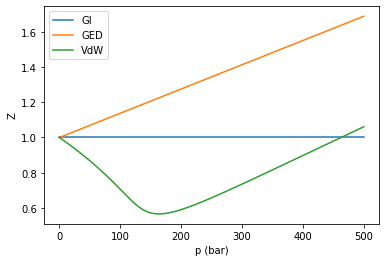

In [7]:
plt.plot(lista_p,lista_Z_GI,label='GI')
plt.plot(lista_p,lista_Z_GED,label='GED')
plt.plot(lista_p,lista_Z_VdW,label='VdW')
plt.xlabel('p (bar)') # Rótulo de eje horizontal
plt.ylabel('Z') #Rótulo de eje vertical
plt.legend() #Para mostrar la leyenda de cada línea graficada
plt.show() #Para mostrar graficar la figura en pantalla

**b)** El plot de $(Z-1)/p$ requiere generar nuevas listas a partir de las anteriores:

In [8]:
lista_Zmenos1sobreP_GI=[] #Genero lista vacía donde voy a guardar los Z asociados a cada presión
lista_Zmenos1sobreP_GED=[]
lista_Zmenos1sobreP_VdW=[]
for i in range(0,len(lista_p)): #i va a ir desde 0 hasta la dimensión de lista_p -no inclusive-
    lista_Zmenos1sobreP_GI.append((lista_Z_GI[i]-1)/lista_p[i]) 
    lista_Zmenos1sobreP_GED.append((lista_Z_GED[i]-1)/lista_p[i]) 
    lista_Zmenos1sobreP_VdW.append((lista_Z_VdW[i]-1)/lista_p[i])

Y ya tenemos en una lista valores de $(Z-1)/p$. Antes de graficar, vamos ya a determinar $\ln \varphi$.

**c)** La estrategia que utilizaremos será la de integrar numéricamente la expresión anterior. Realizaremos la integración entre el primer elemento de nuestro array de presiones (que es una presión cercana a cero), y la presión que querramos.

El método que utilizaremos será el conocido como método trapezoidal, y lo implementaremos nosotros mismos. La figura siguiente intenta describir cómo se aproxima el área debajo de la curva con este método, dibujando un trapezoide, y calculando su área:

![](https://drive.google.com/uc?export=view&id=1sT4Z5EDXb9R9WRj2RUlymb2LjgatcWlo)

Luego, obtenemos $\ln \varphi$ como (el código es un poco largo porque los nombres que elegimos para nuestras listas son excesivamente declarativos, pero leánlo con atención que se parece a lo que venimos haciendo hasta ahora):

In [9]:
lista_lnphi_GI=[]
lista_lnphi_GI.append(0.0) #a p->0 asumimos la integral da 0
valor_GI=0.0
lista_lnphi_GED=[]
lista_lnphi_GED.append(0.0) #a p->0 asumimos la integral da 0
valor_GED=0.0
lista_lnphi_VdW=[]
lista_lnphi_VdW.append(0.0) #a p->0 asumimos la integral da 0
valor_VdW=0.0
for i in range(0,len(lista_p)-1): #como en cada iteración miramos el elemento i y el i+1, no barremos hasta el último elemento de p sino el anteúltimo
    valor_GI=valor_GI+(lista_Zmenos1sobreP_GI[i+1]+lista_Zmenos1sobreP_GI[i])*(lista_p[i+1]-lista_p[i])/2
    valor_GED=valor_GED+(lista_Zmenos1sobreP_GED[i+1]+lista_Zmenos1sobreP_GED[i])*(lista_p[i+1]-lista_p[i])/2
    valor_VdW=valor_VdW+(lista_Zmenos1sobreP_VdW[i+1]+lista_Zmenos1sobreP_VdW[i])*(lista_p[i+1]-lista_p[i])/2
    lista_lnphi_GI.append(valor_GI)
    lista_lnphi_GED.append(valor_GED)
    lista_lnphi_VdW.append(valor_VdW)

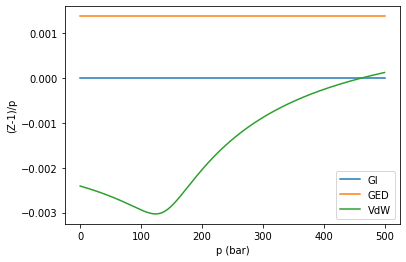

In [10]:
plt.plot(lista_p,lista_Zmenos1sobreP_GI,label='GI')
plt.plot(lista_p,lista_Zmenos1sobreP_GED,label='GED')
plt.plot(lista_p,lista_Zmenos1sobreP_VdW,label='VdW')
plt.xlabel('p (bar)') # Rótulo de eje horizontal
plt.ylabel('(Z-1)/p') #Rótulo de eje vertical
plt.legend() #Para mostrar la leyenda de cada línea graficada
plt.show() #Para mostrar graficar la figura en pantalla

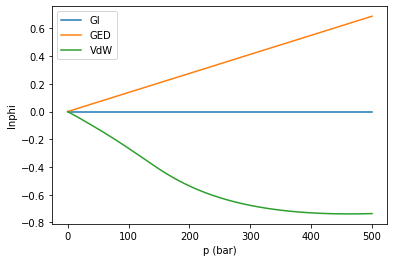

In [11]:
plt.plot(lista_p,lista_lnphi_GI,label='GI')
plt.plot(lista_p,lista_lnphi_GED,label='GED')
plt.plot(lista_p,lista_lnphi_VdW,label='VdW')
plt.xlabel('p (bar)') # Rótulo de eje horizontal
plt.ylabel('lnphi') #Rótulo de eje vertical
plt.legend() #Para mostrar la leyenda de cada línea graficada
plt.show() #Para mostrar graficar la figura en pantalla